

<center><font style="color:rgb(100,109,254)" size=5>Person Detection In Aerial Images and Videos </font> </center>
<center><font style="color:rgb(100,109,254)" size=5>for Dropping Drone Payload </font> </center>
<center> -using YoloV8 </center>



## **<font style="color:rgb(134,19,348)"> Outline </font>**

- **`Step 1:` Download Required Modules**

- **`Step 2:` Download the Dataset**

- **`Step 3:` Import Required Libraries**

- **`Step 4:` implement the YoloV8 Model on Training Data**

- **`Step 5:` Evaluate Model Performance on Validation Data**
    
- **`Step 6:` Test the Custom Trained Model on New Data**
    
    - **`Step 6.1:` Test the Model to Predict People in Images**
  
    - **`Step 6.2:` Test the Model to Predict People in Videos**


### **<font style="color:rgb(134,19,348)"> Step 1: Download Required Modules</font>**

We will download the required libraries.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.8/615.8 kB 11.0 MB/s eta 0:00:00


### **<font style="color:rgb(134,19,348)"> Step 2: Import the Libraries</font>**

We will Download the datasetand connect to Google Drive.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/datasets"

/content/drive/MyDrive/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="o1GE2q0IndqNqtGD05kP")
project = rf.workspace("aerial-person-detection").project("aerial-person-detection")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.187, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Aerial-Person-Detection-3 in yolov8:: 100%|██████████| 13989/13989 [01:37<00:00, 143.87it/s]


### **<font style="color:rgb(134,19,348)"> Step 3: Import the Libraries</font>**
import the required libraries such as **`cv2(opencv)`**,**`pandas`**,**`numpy`**,**`Image(IPython.display)`** etc.

In [ ]:
import cv2
import pandas as pd
import numpy as np
from IPython.display import Image
from moviepy.editor import *

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

### **<font style="color:rgb(134,19,348)"> Step 4: Implement the YoloV8 Model on Training Data</font>**

Train the Pretrained YoloV8 model on Custom Dataset by using **`model.train()`**.

In [ ]:
# Use the model
model.train(data="/content/drive/MyDrive/datasets/Aerial-Person-Detection-3/data.yaml", epochs=10)  # train the model

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/datasets/Aerial-Person-Detection-3/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7962436a0790>
fitness: 0.20514654578955868
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([   0.013036,     0.23951,     0.45623,    0.095669,     0.12329,     0.21711])
names: {0: 'bicycle', 1: 'bus', 2: 'car', 3: 'motorcycle', 4: 'person', 5: 'truck'}
plot: True
results_dict: {'metrics/precision(B)': 0.4452139192398888, 'metrics/recall(B)': 0.3209080402784305, 'metrics/mAP50(B)': 0.3341891994046095, 'metrics/mAP50-95(B)': 0.19080847316566413, 'fitness': 0.20514654578955868}
save_dir: PosixPath('runs/detect/train5')
speed: {'preprocess': 0.8378877552277451, 'inference': 2.118395884102638, 'loss': 0.0006198883056640625, 'postprocess': 5.129608539266324}

 ### **<font style="color:rgb(134,19,348)">Step 5: Evaluate Model Performance on Validation Data</font>**


In [ ]:
# evaluate model performance on the validation set
metrics = model.val()

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/datasets/Aerial-Person-Detection-3/valid/labels.cache... 545 images, 0 backgrounds, 0 corrupt: 100%|██████████| 545/545 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [01:20<00:00,  2.31s/it]
                   all        545      36988      0.448      0.321      0.335      0.191
               bicycle        545       1283        0.3     0.0133     0.0415     0.0131
                   bus        545        251       0.49      0.331      0.358      0.239
                   car        545      13986      0.592       0.69      0.693      0.457
            motorcycle        545       4861      0.448      0.224      0.255     0.0964
                person        545      13890      0.427      0.342      0.332      0.124

In [ ]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 271.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 10.3s, saved as 'runs/detect/train5/weights/best.onnx' (11.7 MB)

Export complete (12.2s)
Results saved to /content/drive/MyDrive/datasets/runs/detect/train5/weights
Predict:         yolo predict task=detect model=runs/detect/train5/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train5/weights/best.onnx imgsz=640 data=/content

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### **<font style="color:rgb(134,19,348)">Step 6: Test the Custom Trained Model on New Data</font>**

In [ ]:
model = YOLO('/content/drive/MyDrive/datasets/runs/detect/train5/weights/best.pt')

### **<font style="color:rgb(134,19,348)">Step 6.1: Test the Model to Predict People in Images </font>**

In [ ]:
from ultralytics.engine import results

In [ ]:
img_results = model('/content/drive/MyDrive/datasets/test_images/basketball.jpg',save = True)


image 1/1 /content/drive/MyDrive/datasets/test_images/basketball.jpg: 320x640 30 persons, 21.9ms
Speed: 3.2ms preprocess, 21.9ms inference, 2.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict


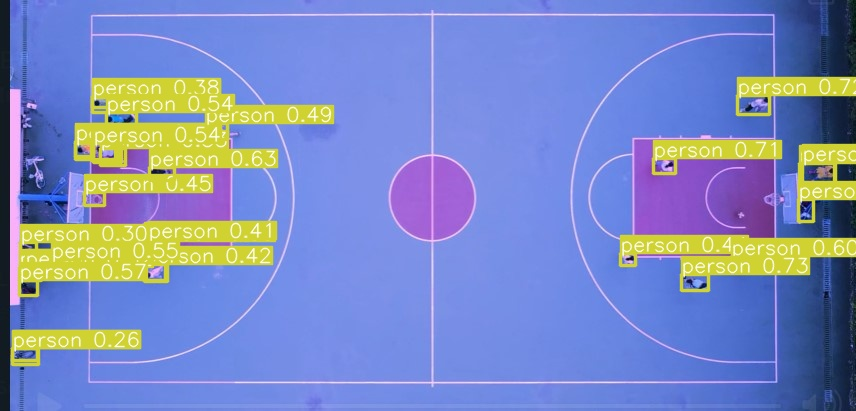

In [ ]:
image = Image(filename="/content/drive/MyDrive/datasets/runs/detect/predict/basketball.jpg")
display(image)
for img_result in img_results:
  list = []
  detection_count = img_result.boxes.shape[0]
  for i in range(detection_count):
    cls = int(img_result.boxes.cls[i].item())
    name = img_result.names[cls]
    list.append(name)
arr = np.array(list)
arr = np.unique(arr)

In [ ]:
img_results = model('/content/drive/MyDrive/datasets/test_images/beach.png',save = True)


image 1/1 /content/drive/MyDrive/datasets/test_images/beach.png: 288x640 8 persons, 23.3ms
Speed: 11.8ms preprocess, 23.3ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict


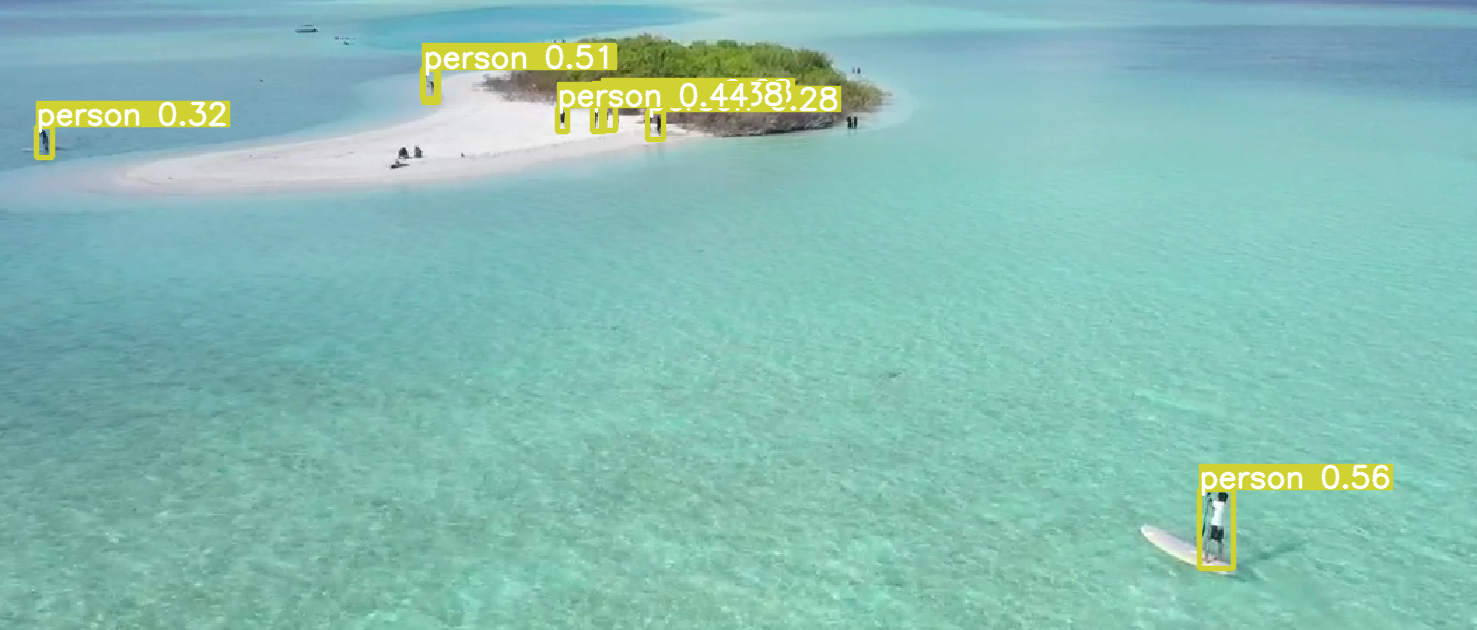

In [ ]:
image = Image(filename="/content/drive/MyDrive/datasets/runs/detect/predict/beach.png")
display(image)
for img_result in img_results:
  list = []
  detection_count = img_result.boxes.shape[0]
  for i in range(detection_count):
    cls = int(img_result.boxes.cls[i].item())
    name = img_result.names[cls]
    list.append(name)
arr = np.array(list)
arr = np.unique(arr)